In [1]:
from tensorflow.keras.applications import VGG16

# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")
model.summary()

553467904/553467096 [==============================] - 229s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

(1200, 1800, 3)


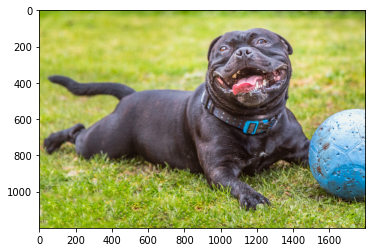

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)
show_image("C:/Users/MSI/Desktop/DL/Datasets/doggy_door/happy_dog.jpg")

In [4]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)

    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image
processed_image = load_and_process_image("C:/Users/MSI/Desktop/DL/Datasets/doggy_door/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


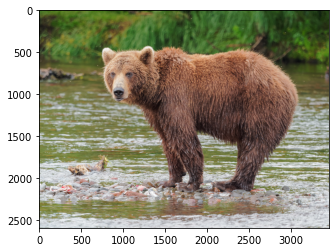

In [5]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")
doggy_door("C:/Users/MSI/Desktop/DL/Datasets/doggy_door/brown_bear.jpg")

In [6]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 39s 1us/step


In [7]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
base_model.trainable = False

In [9]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)

datagen_valid = ImageDataGenerator(samplewise_center=True)

In [14]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "C:/Users/MSI/Desktop/DL/Datasets/doggy_door/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "C:/Users/MSI/Desktop/DL/Datasets/doggy_door/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 139 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [15]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 3s 238ms/step - loss: 0.3531 - binary_accuracy: 0.9011 - val_loss: 1.1989 - val_binary_accuracy: 0.7000
Epoch 2/20
12/12 [==============================] - 2s 118ms/step - loss: 0.2023 - binary_accuracy: 0.9341 - val_loss: 0.6835 - val_binary_accuracy: 0.8333
Epoch 3/20
12/12 [==============================] - 1s 122ms/step - loss: 0.1117 - binary_accuracy: 0.9670 - val_loss: 0.5269 - val_binary_accuracy: 0.9000
Epoch 4/20
12/12 [==============================] - 2s 123ms/step - loss: 0.0885 - binary_accuracy: 0.9451 - val_loss: 0.4056 - val_binary_accuracy: 0.8333
Epoch 5/20
12/12 [==============================] - 2s 133ms/step - loss: 0.1118 - binary_accuracy: 0.9560 - val_loss: 0.3785 - val_binary_accuracy: 0.9000
Epoch 6/20
12/12 [==============================] - 2s 133ms/step - loss: 0.0694 - binary_accuracy: 0.9670 - val_loss: 0.2500 - val_binary_accuracy: 0.9333
Epoch 7/20
12/12 [==============================] - 2s 134ms/ste

In [16]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 9s 288ms/step - loss: 0.1087 - binary_accuracy: 0.9896 - val_loss: 0.0169 - val_binary_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 5s 413ms/step - loss: 0.0056 - binary_accuracy: 0.9890 - val_loss: 0.0184 - val_binary_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 3s 259ms/step - loss: 5.9928e-04 - binary_accuracy: 1.0000 - val_loss: 0.0103 - val_binary_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 3s 272ms/step - loss: 6.9023e-05 - binary_accuracy: 1.0000 - val_loss: 0.0112 - val_binary_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 3s 260ms/step - loss: 7.0771e-05 - binary_accuracy: 1.0000 - val_loss: 0.0060 - val_binary_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 3s 270ms/step - loss: 3.2253e-05 - binary_accuracy: 1.0000 - val_loss: 0.0121 - val_binary_accuracy: 1.0000
Epoch 7/10
12/12 [==============================

array([[-18.700123]], dtype=float32)

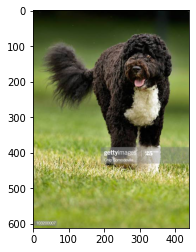

In [18]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds
make_predictions('C:/Users/MSI/Desktop/DL/Datasets/doggy_door/valid/bo/bo_20.jpg')

That's not Bo! Stay out!


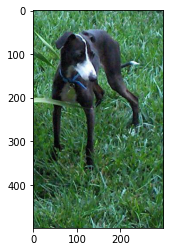

In [19]:
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")
presidential_doggy_door('C:/Users/MSI/Desktop/DL/Datasets/doggy_door/valid/not_bo/131.jpg')